# $0-\pi$ Qubit 
In this notebook, we use SQcircuit to find the spectrum of the $0-\pi$ Qubit based on the following paper:   
_Coherence properties of the 0-π qubit_  

First, we import the SQcircuit from circuit.py file and specify a number for each nodes on the circuit. The number for each node should be consecutive integer starts from zero(corresponds to circuit ground.) 

In [1]:
from circuit import *
import matplotlib.pyplot as plt

<img src="pics/zeroPiQubit_pic1.png" width="200" />

We use Parameter Set 3 of the paper. By the following cell, we find the correspondance capacitance, inductance, and JJ energies to those values.

<img src="pics/zeroPiQubit_pic2.png" width="650" />

In [2]:
### Parameter Set 1
# E_C = hbar*2*np.pi*0.02*GHz
# E_CJ = hbar*2*np.pi*20*GHz
# E_J = hbar*2*np.pi*10*GHz
# E_L = hbar*2*np.pi*0.008*GHz
# C = e**2/2/E_C
# C_J = e**2/2/E_CJ
# L = (Phi0/2/np.pi)**2/E_L

### Parameter Set 2
# E_C = hbar*2*np.pi*0.04*GHz
# E_CJ = hbar*2*np.pi*20*GHz
# E_J = hbar*2*np.pi*10*GHz
# E_L = hbar*2*np.pi*0.04*GHz
# C = e**2/2/E_C
# C_J = e**2/2/E_CJ
# L = (Phi0/2/np.pi)**2/E_L

### Parameter Set 3
# E_C = hbar*2*np.pi*0.15*GHz
# E_CJ = hbar*2*np.pi*10*GHz
# E_J = hbar*2*np.pi*5*GHz
# E_L = hbar*2*np.pi*0.13*GHz
# C = e**2/2/E_C
# C_J = e**2/2/E_CJ
# L = (Phi0/2/np.pi)**2/E_L

We create the object of SQcircuit by initializing it with `circuitParam` dictionary.

In [3]:
C = Capacitor(0.15, "GHz")
CJ = Capacitor(10, "GHz")
JJ = Junction(5, "GHz")
L = Inductor(0.13, "GHz")

circuitParam = {(0, 1): [CJ, JJ],
                (0, 2): [L],
                (0, 3): [C],
                (1, 2): [C],
                (1, 3): [L],
                (2, 3): [CJ, JJ]}

# cr is an object of Qcircuit
cr1 = Circuit(circuitParam)

Natural frequencies of the circuit:
[2.02626722e+10 2.48166038e+09 0.00000000e+00]
W transformed matrix:
[[-1.  0.  1.]
 [-1.  0. -1.]]


## Circuit Eigenvalues

In [4]:
cr1.setTruncationNumbers([25, 3, 25])
numEig=5
phiExt = np.linspace(0,1,100)*2*np.pi
eigenValues = np.zeros((5, len(phiExt)))
for i in range(len(phiExt)):
    cr1.setExternalFluxes({(0, 1): phiExt[i]})
    eigenValues[:, i], _ = cr1.run(numEig)

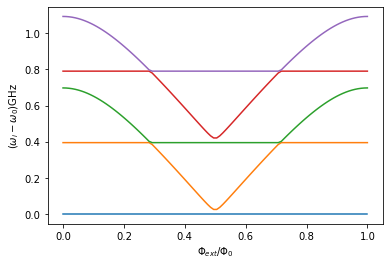

In [5]:
plt.figure()
for i in range(5):
    plt.plot(phiExt/2/np.pi, (eigenValues[i, :]-eigenValues[0, :]).real/GHz/2/np.pi)

plt.xlabel(r"$\Phi_{ext}/\Phi_0$")
plt.ylabel(r"($\omega_i-\omega_0$)GHz")
plt.show()

The next cell shows the spectrum from the figure 4 of the paper, which is the same spectrum that Qcircuit calculated.

<img src="pics/zeroPiQubit_pic3.png" width="250" align = "left" />

## Circuit Eigenvectors

In [6]:
cr1.setTruncationNumbers([61, 1, 61])
cr1.setExternalFluxes({(0, 1): 0})
eigVec, eigVal = cr1.run(numEig=4)

In [7]:
phi = np.pi*np.linspace(-1,1,100)
theta = np.pi*np.linspace(-0.3,1.3,100)
Phi, Theta = np.meshgrid(phi,theta)
state0  = np.squeeze(cr1.eigVecPhaseSpace(0,[Phi ,0 , Theta]))

Text(0, 0.5, '$\\theta$')

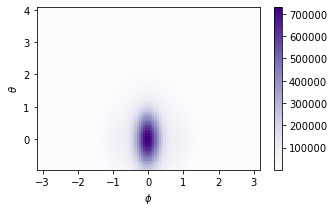

In [8]:
plt.figure(figsize=(5, 3))
plt.pcolor(Phi, Theta, np.abs(state0),cmap="Purples",shading='auto')
plt.colorbar()
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\theta$')

In [14]:
print(np.sum(np.abs(state0)**2)*np.diff(phi)[0]*np.diff(theta)[0])

12603.345064912488
